In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import joblib 

In [2]:
df_train = pd.read_csv("statistics_10_train.csv" , sep = ',')
df_test = pd.read_csv("statistics_10_test.csv" , sep = ',')

In [3]:
X_train = df_train[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y_train = df_train['Tipo'].values
X_test = df_test[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y_test = df_test['Tipo'].values

----- n estimators: 10----- Accuracy test: 0.9444444444444444-----
----- n estimators: 20----- Accuracy test: 0.9444444444444444-----
----- n estimators: 30----- Accuracy test: 0.9444444444444444-----
----- n estimators: 40----- Accuracy test: 0.9444444444444444-----
----- n estimators: 50----- Accuracy test: 0.9444444444444444-----
----- n estimators: 60----- Accuracy test: 0.9444444444444444-----
----- n estimators: 70----- Accuracy test: 0.9333333333333333-----
----- n estimators: 80----- Accuracy test: 0.9444444444444444-----
----- n estimators: 90----- Accuracy test: 0.9444444444444444-----
----- n estimators: 100----- Accuracy test: 0.9444444444444444-----
----- n estimators: 110----- Accuracy test: 0.9444444444444444-----
----- n estimators: 120----- Accuracy test: 0.9444444444444444-----
----- n estimators: 130----- Accuracy test: 0.9444444444444444-----
----- n estimators: 140----- Accuracy test: 0.9444444444444444-----


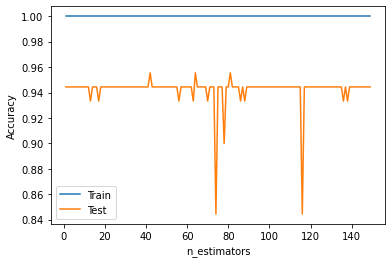

In [4]:
n_estimators = range(1,150)
scores_train = []
scores_test = []
for i in n_estimators:
    abModel = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators = i, learning_rate = 0.1)
    abModel.fit(X_train, y_train)
    scores_train.append(abModel.score(X_train, y_train))
    scores_test.append(abModel.score(X_test, y_test))
    if (i % 10 == 0):
        print('----- n estimators: ' + str(i) + '----- Accuracy test: ' + str(scores_test[i - 1]) + '-----')
plt.figure()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.plot(n_estimators, scores_train, label = 'Train')
plt.plot(n_estimators, scores_test, label = 'Test')
plt.legend()

In [5]:
n_estimators

range(1, 150)

In [6]:
abModel = AdaBoostClassifier(RandomForestClassifier(n_estimators = 90, min_samples_split = 2, min_samples_leaf  = 1),
                             n_estimators = 125, random_state=0)
abModel.fit(X_train, y_train)
pred_abModel = abModel.predict(X_test)

In [7]:
pred_train_abModel = abModel.predict(X_train)
print(confusion_matrix(y_train, pred_train_abModel))
print(classification_report(y_train, pred_train_abModel))

[[90  0  0]
 [ 0 90  0]
 [ 0  0 90]]
              precision    recall  f1-score   support

       Inner       1.00      1.00      1.00        90
       Outer       1.00      1.00      1.00        90
        Sano       1.00      1.00      1.00        90

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [8]:
print(confusion_matrix(y_test, pred_abModel))
print(classification_report(y_test, pred_abModel))

[[28  2  0]
 [ 0 30  0]
 [ 0  3 27]]
              precision    recall  f1-score   support

       Inner       1.00      0.93      0.97        30
       Outer       0.86      1.00      0.92        30
        Sano       1.00      0.90      0.95        30

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.95        90
weighted avg       0.95      0.94      0.95        90



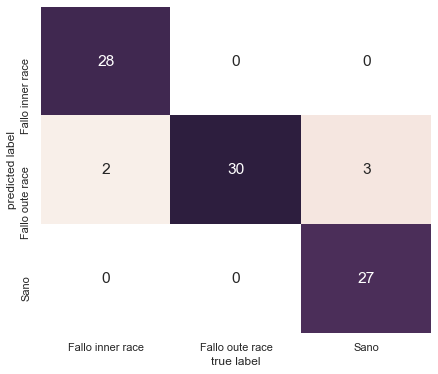

In [9]:
sns.set()
mat = confusion_matrix(y_test, pred_abModel)
fig, ax = plt.subplots(figsize=(7,6))
sns.set(font_scale=1.3)
sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False,
            xticklabels=['Fallo inner race', 'Fallo oute race', 'Sano'],
            yticklabels=['Fallo inner race', 'Fallo oute race', 'Sano'],
            cmap=sns.cubehelix_palette(light=1, as_cmap=True))

plt.xlabel('true label');
plt.ylabel('predicted label');

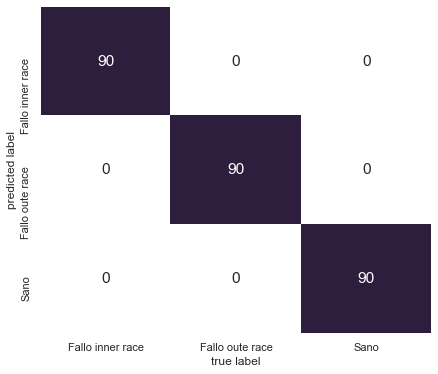

In [10]:
sns.set()
mat = confusion_matrix(y_train, abModel.predict(X_train))
fig, ax = plt.subplots(figsize=(7,6))
sns.set(font_scale=1.3)
sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False,
            xticklabels=['Fallo inner race', 'Fallo oute race', 'Sano'],
            yticklabels=['Fallo inner race', 'Fallo oute race', 'Sano'],
            cmap=sns.cubehelix_palette(light=1, as_cmap=True))

plt.xlabel('true label');
plt.ylabel('predicted label');